# Machine Learning-Regression in scikit learn

In [3]:
# Install library
# python -m pip install scikit-learn
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Other
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression

In [4]:
# import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
# How to select two columns?
df_linear = df[['age','fare']]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [13]:
#Simple linear regression
# Features in X must be in two dimension
X = df[['age']]
y = df['fare']


In [23]:
df_linear.age.fillna(value=df_linear['age'].mean(), inplace=True)

C:\Users\IBM\AppData\Local\Temp\ipykernel_11468\3808235274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_linear.age.fillna(value=df_linear['age'].mean(), inplace=True)
C:\Users\IBM\AppData\Local\Temp\ipykernel_11468\3808235274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value=df_linear['age'].mean(), inpla

In [15]:
X

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [24]:
# dealing the missing values
df_linear.isnull().sum() / len(X) * 100

age     0.0
fare    0.0
dtype: float64

In [17]:
y.isnull().sum() / len(y) * 100

0.0

In [18]:
# removing missing values help us to get the same data shape
X.shape

(891, 1)

In [19]:
y.shape

(891,)

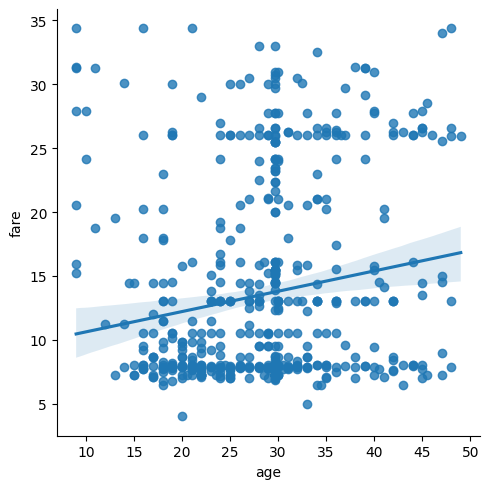

In [49]:
# Plot
sns.lmplot(data=df_linear, x='age', y='fare' )

<Axes: ylabel='age'>

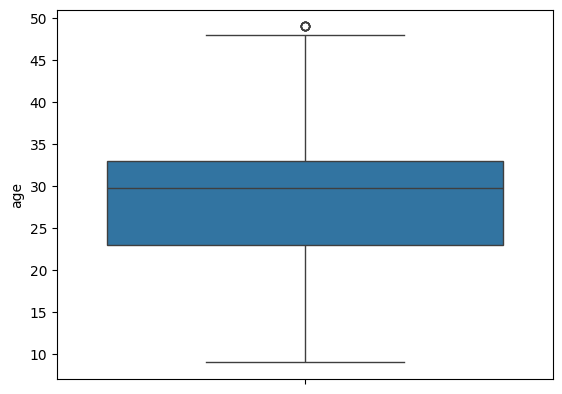

In [36]:
# To remove the outliera
sns.boxplot(data=df_linear, y='age')

In [35]:
df_linear = df_linear[(df_linear['age'] > 8) & (df_linear['age'] < 50)]

<Axes: ylabel='fare'>

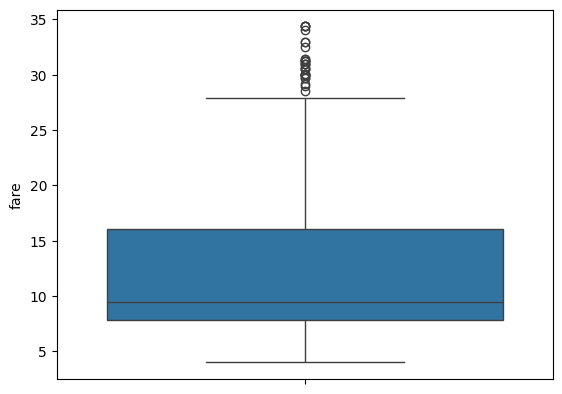

In [47]:
sns.boxplot(data=df_linear, y='fare')

In [39]:
df_linear['fare'].min()

0.0

In [46]:
df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] < 35)]

In [52]:
X = df_linear[['age']]
y = df_linear['fare']

In [56]:
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression

# call model
model  = LinearRegression()

# Train model

model.fit(X,y)

#Model prediction
model.predict([[55]])

c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.77917613])

In [ ]:
# Model evaluation with metrices
# R square
# Mean Squared Error (MSE)
# Mean Absolute Error (MAE)
# Root mean suqre error (RMSE)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Model
model = LinearRegression() 

#train
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_test)
y_pred



<Axes: xlabel='fare'>

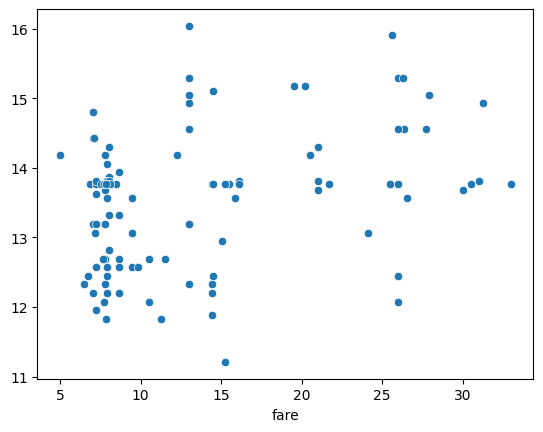

In [66]:
# Compare
sns.scatterplot(x = y_test, y = y_pred)

In [58]:
X_train.shape

(471, 1)

In [59]:
y_train.shape

(471,)

In [60]:
X_test.shape

(118, 1)

In [61]:
y_test.shape

(118,)

In [67]:
# Check the accuracy based on score
# What is model .score in scikit-learn? what does it's value shows?

model.score(X_test, y_test)

0.0630104958160026

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
# Regression Model evaluation

MAE = mean_absolute_error(y_true=y_test, y_pred= y_pred)
MSE = mean_squared_error(y_true=y_test, y_pred= y_pred)
RMSE = mean_squared_error(y_true=y_test, y_pred= y_pred, squared=False)
R2 = r2_score(y_true=y_test, y_pred= y_pred)

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('R2: ', R2)

# check the values for these metrices (at which it is good) (interpretation of linear regression metrices)

MAE:  5.911744107015246
MSE:  50.234130588020044
RMSE:  7.087604008973699
R2:  0.0630104958160026


c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [70]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

7.087604008973699

In [ ]:
# Perform multi linear regression on "Iris"
#sns.load_dataset('iris')
# Take first three columns in X and fourth on y-axis
# Apply decision tree classifier on the same dataset
# First four columns are on X and the last column is on Y
# At the place of linear regression use decision tree classifier